In [81]:
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [82]:
import numpy as np

from matplotlib import pyplot as plt

from modules import utils
import importlib
importlib.reload(utils)

utils.set_plot_configs()

In [83]:
def read_data(data_file='uranium.spe',clip=[12,-17]):
    count = []

    with open(data_file) as f:
        for line in f.readlines():
            count.append(line.strip())

    count = np.array(count[clip[0]:clip[1]],dtype=float)
    if len(count) != 2048:
        raise ValueError('Data file does not have the correct number of channels')
    energy_bins = np.linspace(0,3,2049)
    energy = (energy_bins[1:] + energy_bins[:-1])/2

    return {
        'energy': energy,
        'count': count,
        'count_err': np.sqrt(count),
    }

def show_data(data,save_fig=None):
    fig, ax = plt.subplots(figsize=(9,7))

    mask = data['count'] > 0
    for key in data:
        data[key] = data[key][mask]

    ax.errorbar(
        data['energy'], data['count'], #yerr=data['count_err'],
        fmt='-', markersize=5,elinewidth=3,capsize=5,alpha=0.75,
        color='maroon'
    )
    
    ax.set_xlabel('Energy (MeV)')
    ax.set_ylabel('Counts')

    ax.set_xlim(0,3)
    ax.set_ylim(1)

    ax.set_yscale('log')

    plt.tight_layout()
    if save_fig:
        plt.savefig(save_fig)

    plt.show()

Count:
 Shape: (2048,)
 Min:   0.00e+00
 Max:   8.00e+05
 Mean:  1.06e+04
 Std:   4.53e+04


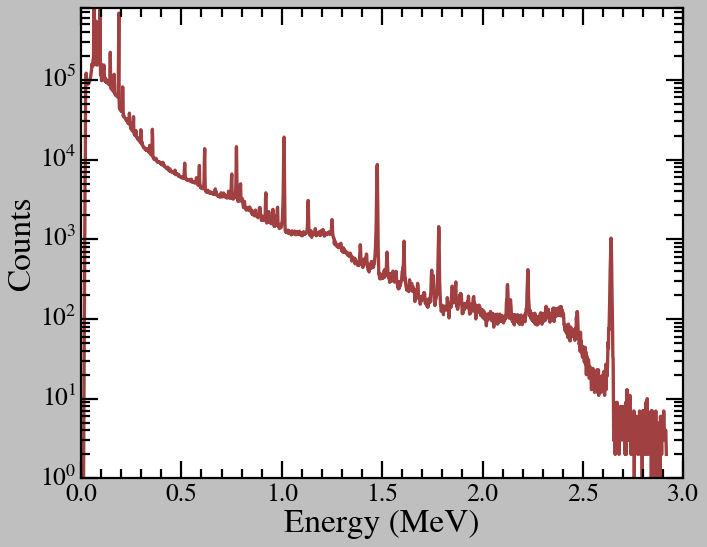

In [84]:
data = read_data()
print('Count:')
utils.check_array(data['count'])

show_data(data,save_fig='uranium_spectrum.png')